<div style="font-size:15pt;margin-bottom:0;text-align: right"><b>FIT1043 Introduction to Data Science</b></div>
<div style="font-size:15pt;margin-top:0;text-align: right"><b>Assignment 1</b></div>
<br>
<div style="text-align: right"> Loh Jing Wei </div>
<div style="text-align: right"> 30856183 </div>
<div style="text-align: right"> <i> 1st April 2022 </i> </div>
<hr style="border:0.5px solid gray"> </hr>

## Introduction

This assignment is about descriptive statistics. It consists of data wrangling, data auditing, and plotting graphs to visualise the data. The data that will be used are mainly from kaggle.org, worldbank.org and population.un.org. We will examine the life expectancy, along with factors which affect life expectancy, of South East Asian countries. 
In the Data Wrangling and data auditing section, useful data will be extracted and merged into one DataFrame and a new column for GDP per capita will be created. We will then answer 3 questions regarding life expectancy and how other factors such as the economic status of a country (developed vs developing), population, adult mortality, and infant deaths affect the life expectancy.

***
### Importing Libraries

We import the library <b>pandas</b> to use the data structure DataFrame and the related functions to read data from CSV files as well as data manipulation and analysis. We also import library <b>matplotlib.pyplot</b> to plot graphs and use its related functions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
life_expectancy = pd.read_csv("LifeExpectancyData-v2.csv")
GDP = pd.read_csv("2019-GDP.csv")
population = pd.read_csv("2020-Population.csv")

A SEA list is created to store the names of the countries that are required for the final DataFrame.
<br>List is chosen because it can be used to select entries where its column value (specifically "country" column) is in the list.

In [3]:
SEA = ["Brunei Darussalam","Cambodia","Indonesia","Lao PDR","Malaysia","Myanmar","Philippines","Singapore","Thailand","Timor-Leste","Vietnam"]

***
## Data Auditing for life_expectancy DataFrame

We use .shape function to check the number of rows and columns in this DataFrame. Then, we check the head and tail to know roughly the values that should appear in each column.

In [4]:
life_expectancy.shape

(2938, 15)

In [5]:
life_expectancy.head(20)

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,62,263.0,19.1,0.01,65.0,1154,6.0,65.0,0.1,0.479,10.1
1,Afghanistan,2014,Developing,59.9,64,271.0,18.6,0.01,62.0,492,58.0,62.0,0.1,0.476,10.0
2,Afghanistan,2013,Developing,59.9,66,268.0,18.1,0.01,64.0,430,62.0,64.0,0.1,0.470,9.9
3,Afghanistan,2012,Developing,59.5,69,272.0,17.6,0.01,67.0,2787,67.0,67.0,0.1,0.463,9.8
4,Afghanistan,2011,Developing,59.2,71,275.0,17.2,0.01,68.0,3013,68.0,68.0,0.1,0.454,9.5
5,Afghanistan,2010,Developing,58.8,74,279.0,16.7,0.01,66.0,1989,66.0,66.0,0.1,0.448,9.2
6,Afghanistan,2009,Developing,58.6,77,281.0,16.2,0.01,63.0,2861,63.0,63.0,0.1,0.434,8.9
7,Afghanistan,2008,Developing,58.1,80,287.0,15.7,0.03,64.0,1599,64.0,64.0,0.1,0.433,8.7
8,Afghanistan,2007,Developing,57.5,82,295.0,15.2,0.02,63.0,1141,63.0,63.0,0.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,84,295.0,14.7,0.03,64.0,1990,58.0,58.0,0.1,0.405,8.1


In [6]:
life_expectancy.tail(20)

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
2918,Zambia,2003,Developing,46.4,39,64.0,17.6,2.33,NaN,881,85.0,83.0,18.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,41,69.0,17.3,2.44,NaN,25036,85.0,84.0,18.4,0.433,10.0
2920,Zambia,2001,Developing,44.6,43,611.0,17.1,2.61,NaN,16997,86.0,85.0,18.6,0.424,9.8
2921,Zambia,2000,Developing,43.8,44,614.0,16.8,2.62,NaN,30930,85.0,85.0,18.7,0.418,9.6
2922,Zimbabwe,2015,Developing,67.0,22,336.0,31.8,NaN,87.0,0,88.0,87.0,6.2,0.507,10.3
2923,Zimbabwe,2014,Developing,59.2,23,371.0,31.3,6.50,91.0,0,92.0,91.0,6.3,0.498,10.3
2924,Zimbabwe,2013,Developing,58.0,25,399.0,3.8,6.39,95.0,0,95.0,95.0,6.8,0.488,10.4
2925,Zimbabwe,2012,Developing,56.6,26,429.0,3.3,6.09,97.0,0,95.0,95.0,8.8,0.464,9.8
2926,Zimbabwe,2011,Developing,54.9,28,464.0,29.9,6.00,94.0,0,93.0,93.0,13.3,0.452,10.1
2927,Zimbabwe,2010,Developing,52.4,29,527.0,29.4,5.21,9.0,9696,89.0,89.0,15.7,0.436,10.0


***
## Data Wrangling for life_expectancy DataFrame

### Checking life_expectancy DataFrame column names

We check the names of each columns to be used later.

In [7]:
life_expectancy.columns.to_list()

['country',
 'Year',
 'Status',
 'Life expectancy ',
 'infant deaths',
 'Adult Mortality',
 ' BMI ',
 'Alcohol consumption',
 'Hepatitis B',
 'Measles ',
 'Polio',
 'Diphtheria ',
 ' HIV/AIDS',
 'Income composition of resources',
 'Schooling']

### Create filter to select SEA countries in life_expectancy DataFrame

We create a filter for life_expectancy Dataframe to select rows from DataFrame for countries in SEA list using .isin() function.

In [8]:
life_expectancy_SEA_filt = life_expectancy["country"].isin(SEA)

### Checking for Inconsistency across SEA country names in life_expectancy DataFrame

We create a new DataFrame called SEA_country_count which: <br>
Uses life_expectancy_SEA_filt filter to select rows from life_expectancy DataFrame for country in SEA list.
Uses .groupby() function to group entries according to column "country".
Then uses .count() to count number of entries for "country" column per SEA country.

In [9]:
SEA_country_count = life_expectancy[life_expectancy_SEA_filt].groupby("country")["country"].count()
SEA_country_count

country
Brunei Darussalam    16
Cambodia             16
Indonesia            16
Malaysia             16
Myanmar              16
Philippines          16
Singapore            16
Thailand             16
Timor-Leste          16
Name: country, dtype: int64

Using .shape function to check if number of country in SEA_country_count DataFrame is equal to number of items in SEA list.

In [10]:
SEA_country_count.shape

(9,)

From here, we can see there is only 9 countries in SEA_count DataFrame, whereas SEA list has 11 countries. 
The missing countries are Lao PDR and Vietnam.

### Changing the country names in life_expectancy DataFrame

First, we check for the alternative names of the missing countries to see if they are used in the life_expectancy DataFrame.
We select the rows which contain the alternative names.
We then count the number of entries to determine if the alternative names are present in the life_expectancy DataFrame.

In [11]:
life_expectancy[life_expectancy["country"] == "Lao People's Democratic Republic"]["country"].count()

16

Here, we got 16 entries, so we know that Lao PDR is named as Lao People's Democratic Republic in life_expectancy DataFrame. We can now change the name to "Lao PDR".

In [12]:
life_expectancy.loc[life_expectancy["country"]=="Lao People's Democratic Republic","country"] = "Lao PDR"

We repeat the same procedures for Vietnam.

In [13]:
life_expectancy[life_expectancy["country"] == "Viet Nam"]["country"].count()

16

In [14]:
life_expectancy.loc[life_expectancy["country"]=="Viet Nam","country"] = "Vietnam"

Now, we check again if all SEA country name in SEA list correspond to those in column "country" of life_expectancy DataFrame.

In [15]:
SEA_country_count2 = life_expectancy[life_expectancy_SEA_filt].groupby("country")["country"].count()
SEA_country_count2

country
Brunei Darussalam    16
Cambodia             16
Indonesia            16
Malaysia             16
Myanmar              16
Philippines          16
Singapore            16
Thailand             16
Timor-Leste          16
Name: country, dtype: int64

In [16]:
SEA_country_count2.shape

(9,)

Since there are 11 rows in SEA_country_count2, we can conclude that all the SEA countries are included in life_expectancy DataFrame. 
Each SEA country has 16 rows in life_expectancy DataFrame, corresponding to 16 years of entries for each country.

### Checking for null values for SEA countries in life_expectancy DataFrame

Select rows from life_expectancy DataFrame for countries in SEA list.
Then using the .isnull() and .sum() function, find the numbers of null values is each column of life_expectancy DataFrame.

In [17]:
life_expectancy[life_expectancy_SEA_filt].isnull().sum()

country                             0
Year                                0
Status                              0
Life expectancy                     0
infant deaths                       0
Adult Mortality                     0
 BMI                                0
Alcohol consumption                 8
Hepatitis B                        17
Measles                             0
Polio                               2
Diphtheria                          2
 HIV/AIDS                           0
Income composition of resources     0
Schooling                           0
dtype: int64

As we can see, only the columns "Alcohol consumption", "Hepatitis B", "Diphtheria" and " HIV/AIDS" has null values. These columns are not used in further investigations, hence we won't be doing any correction for these null values.

### Checking for misspelling in Status column for SEA countries

We can use .nunique() to check if there are multiple unique entries in Status column for each SEA country. There should only be one type of entry for each country (either Developed or Developing)

In [18]:
SEA_Status_count = life_expectancy[life_expectancy_SEA_filt].groupby("country")["Status"].nunique()
SEA_Status_count

country
Brunei Darussalam    1
Cambodia             1
Indonesia            1
Malaysia             1
Myanmar              1
Philippines          1
Singapore            1
Thailand             1
Timor-Leste          1
Name: Status, dtype: int64

As there is none, we can conclude that there are no misspelings and missing values in Status column.

### Aggregate max_life_expectancy, mean_BMI, mean_income_composition_of_resoruces, mean_scholling, and mean_life_expectancy columns

First, we have to create a function to aggregate the data.

In [19]:
fun = {"Life expectancy ":{"max","mean"}," BMI ":"mean","Income composition of resources":"mean","Schooling":"mean"}

Next, we use .groupby() to group the DataFrame by country and Status. Then, we use .agg() to aggregate the data using the above function to get max life expectancy, mean life expectancy, mean BMI, mean income composition of resources, and mean schooling.

In [20]:
groupbycountry = life_expectancy.groupby(["country","Status"]).agg(fun)
groupbycountry

Life expectancy         \
                                                          mean   max   
country                            Status                              
Afghanistan                        Developing         58.19375  65.0   
Albania                            Developing         75.15625  77.8   
Algeria                            Developing         73.61875  75.6   
Angola                             Developing         49.01875  56.0   
Antigua and Barbuda                Developing         75.05625  76.4   
...                                                        ...   ...   
Venezuela (Bolivarian Republic of) Developing         73.38750  74.1   
Vietnam                            Developing         74.77500  76.0   
Yemen                              Developing         63.86250  68.0   
Zambia                             Developing         53.90625  63.0   
Zimbabwe                           Developing         50.48750  67.0   

                                                   BMI   \
                                                   mean   
country                            Status                 
Afghanistan                        Developing  15.51875   
Albania                            Developing  49.06875   
Algeria                            Developing  48.74375   
Angola                             Developing  18.01875   
Antigua and Barbuda                Developing  38.42500   
...                                                 ...   
Venezuela (Bolivarian Republic of) Developing  54.48750   
Vietnam                            Developing  11.18750   
Yemen                              Developing  33.48750   
Zambia                             Developing  17.45000   
Zimbabwe                           Developing  25.13750   

                                              Income composition of resources  \
                                                                         mean   
country                            Status                                       
Afghanistan                        Developing                        0.415375   
Albania                            Developing                        0.709875   
Algeria                            Developing                        0.694875   
Angola                             Developing                        0.458375   
Antigua and Barbuda                Developing                        0.488625   
...                                                                       ...   
Venezuela (Bolivarian Republic of) Developing                        0.726812   
Vietnam                            Developing                        0.627062   
Yemen                              Developing                        0.475500   
Zambia                             Developing                        0.498437   
Zimbabwe                           Developing                        0.439125   

                                              Schooling  
                                                   mean  
country                            Status                
Afghanistan                        Developing   8.21250  
Albania                            Developing  12.13750  
Algeria                            Developing  12.71250  
Angola                             Developing   8.04375  
Antigua and Barbuda                Developing   8.84375  
...                                                 ...  
Venezuela (Bolivarian Republic of) Developing  12.78750  
Vietnam                            Developing  11.51250  
Yemen                              Developing   8.50625  
Zambia                             Developing  11.21250  
Zimbabwe                           Developing   9.82500  

[193 rows x 5 columns]

<b>Flatten the DataFrame</b> <br> We can then reset the index using .reset_index() and drop the top level of the column using .columns.droplevel(0). As well as rename the columns into country, Status, max_life_expectancy, mean_life_expectancy, mean_BMI, mean_income_composition_of_resources, and mean_schooling respectively.

In [21]:
groupbycountry = groupbycountry.reset_index()
groupbycountry.columns = groupbycountry.columns.droplevel(0)
groupbycountry.columns = ["country","Status","max_life_expectancy","mean_life_expectancy","mean_BMI","mean_income_composition_of_resources","mean_schooling"]
groupbycountry

,country,Status,max_life_expectancy,mean_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling
0,Afghanistan,Developing,58.19375,65.0,15.51875,0.415375,8.21250
1,Albania,Developing,75.15625,77.8,49.06875,0.709875,12.13750
2,Algeria,Developing,73.61875,75.6,48.74375,0.694875,12.71250
3,Angola,Developing,49.01875,56.0,18.01875,0.458375,8.04375
4,Antigua and Barbuda,Developing,75.05625,76.4,38.42500,0.488625,8.84375
...,...,...,...,...,...,...,...
188,Venezuela (Bolivarian Republic of),Developing,73.38750,74.1,54.48750,0.726812,12.78750
189,Vietnam,Developing,74.77500,76.0,11.18750,0.627062,11.51250
190,Yemen,Developing,63.86250,68.0,33.48750,0.475500,8.50625
191,Zambia,Developing,53.90625,63.0,17.45000,0.498437,11.21250


***
## Data Auditing for GDP DataFrame

We use .shape function to check the number of rows and columns in this DataFrame. Then, we check the head and tail to know roughly the values that should appear in each column.

In [22]:
GDP.shape

(244, 6)

In [23]:
GDP.head(20)

,Unnamed: 0,Gross domestic product 2019,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,(millions of,NaN
2,NaN,Ranking,NaN,Economy,US dollars),NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,1,NaN,United States,"21,427,700",NaN
5,CHN,2,NaN,China,"14,342,903",NaN
6,JPN,3,NaN,Japan,"5,081,770",NaN
7,DEU,4,NaN,Germany,"3,845,630",NaN
8,IND,5,NaN,India,"2,875,142",NaN
9,GBR,6,NaN,United Kingdom,"2,827,113",NaN


In [24]:
GDP.tail(20)

,Unnamed: 0,Gross domestic product 2019,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
224,WLD,NaN,NaN,World,"87,751,541",NaN
225,NaN,NaN,NaN,NaN,NaN,NaN
226,NaN,NaN,NaN,NaN,NaN,NaN
227,EAS,NaN,NaN,East Asia & Pacific,"26,979,806",NaN
228,ECS,NaN,NaN,Europe & Central Asia,"22,748,789",NaN
229,LCN,NaN,NaN,Latin America & Caribbean,"5,719,253",NaN
230,MEA,NaN,NaN,Middle East & North Africa,"3,701,386",NaN
231,NAC,NaN,NaN,North America,"23,171,055",NaN
232,SAS,NaN,NaN,South Asia,"3,597,970",NaN
233,SSF,NaN,NaN,Sub-Saharan Africa,"1,755,011",NaN


***
## Data Wrangling for GDP DataFrame

### Checking GDP DataFrame column names

We check the names of each columns to be used later.

In [25]:
GDP.columns.to_list()

['Unnamed: 0',
 'Gross domestic product 2019',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5']

As we can see from above, most of the columns for GDP DataFrame are unnamed. As we only need columns Unnamed: 3 and Unnamed: 4 for the country and GDP values, we will rename and keep those two columns only.

In [26]:
GDP.rename(
    columns={"Unnamed: 3":"country","Unnamed: 4":"GDP(10^6)"},
    inplace=True
)

Create a new GDP DataFrame which includes only the "country" and "GDP" columns

In [27]:
GDP = GDP[["country","GDP(10^6)"]]
GDP

,country,GDP(10^6)
0,NaN,NaN
1,NaN,(millions of
2,Economy,US dollars)
3,NaN,NaN
4,United States,"21,427,700"
...,...,...
239,NaN,NaN
240,NaN,NaN
241,NaN,NaN
242,NaN,NaN


### Create filter to select SEA countries in GDP DataFrame

Create filter for GDP Dataframe to select rows from DataFrame for countries in SEA list using .isin() function.

In [28]:
GDP_SEA_filt = GDP["country"].isin(SEA)

### Checking for Inconsistency across SEA country names in GDP DataFrame

Create a new DataFrame called SEA_GDP_count which: <br>
    Uses GDP_SEA_filt filter to select rows from GDP DataFrame where column "country" values is in the SEA list.
    Use .groupby() function to group entries according to column "country".
    Then using .count() to count number of entries per SEA country.

In [29]:
SEA_GDP_count = GDP[GDP_SEA_filt].groupby("country")["country"].count()
SEA_GDP_count

country
Brunei Darussalam    1
Cambodia             1
Indonesia            1
Lao PDR              1
Malaysia             1
Myanmar              1
Philippines          1
Singapore            1
Thailand             1
Timor-Leste          1
Vietnam              1
Name: country, dtype: int64

Using .shape function to check if number of country in SEA_GDP_count DataFrame is equal to number of items in SEA list.

In [30]:
SEA_GDP_count.shape

(11,)

Since there are 11 rows in SEA_GDP_count, we can conclude that all the SEA countries are included in GDP DataFrame. And there is 1 entry per SEA country (which is the GDP).

### Checking for null values for SEA countries in GDP DataFrame

Using GDP_SEA_filt filter to select rows from GDP DataFrame for countries in SEA list.
Then using the .isnull() and .sum() function, find the numbers of null values is each column of GDP DataFrame

In [31]:
GDP[GDP_SEA_filt].isnull().sum()

country      0
GDP(10^6)    0
dtype: int64

There is no null values in the GDP dataframe for SEA countries, hence there is no missing entries.

***
## Data Auditing for population DataFrame

Again, we use .shape function to check the number of rows and columns in this DataFrame. Then, we check the head and tail to know roughly the values that should appear in each column.

In [32]:
population.shape

(305, 78)

In [33]:
population.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,World Population Prospects 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,File POP/1-1: Total population (both sexes com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Estimates, 1950 - 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
population.tail(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77
285,270,Estimates,San Marino,NaN,674,Country/Area,925,13,13,13,...,32,32,33,33,33,34,34,34,34,34
286,271,Estimates,Serbia,31,688,Country/Area,925,6 732,6 853,6 963,...,8 964,8 940,8 919,8 898,8 877,8 854,8 830,8 803,8 772,8 737
287,272,Estimates,Slovenia,NaN,705,Country/Area,925,1 473,1 482,1 492,...,2 051,2 058,2 063,2 067,2 071,2 074,2 076,2 078,2 079,2 079
288,273,Estimates,Spain,32,724,Country/Area,925,28 070,28 220,28 399,...,47 084,47 063,46 931,46 778,46 672,46 634,46 647,46 693,46 737,46 755
289,274,Estimates,Western Europe,NaN,926,Subregion,917,142 414,143 163,144 007,...,188 782,189 528,190 347,191 208,192 084,192 979,193 886,194 755,195 522,196 146
290,275,Estimates,Austria,NaN,40,Country/Area,926,6 936,6 931,6 931,...,8 454,8 502,8 556,8 615,8 679,8 747,8 820,8 891,8 955,9 006
291,276,Estimates,Belgium,NaN,56,Country/Area,926,8 638,8 680,8 728,...,11 014,11 085,11 154,11 221,11 288,11 354,11 420,11 482,11 539,11 590
292,277,Estimates,France,33,250,Country/Area,926,41 834,42 031,42 316,...,63 222,63 564,63 894,64 194,64 453,64 668,64 843,64 991,65 130,65 274
293,278,Estimates,Germany,NaN,276,Country/Area,926,69 966,70 300,70 620,...,80 856,80 973,81 174,81 450,81 787,82 194,82 658,83 124,83 517,83 784
294,279,Estimates,Liechtenstein,NaN,438,Country/Area,926,14,14,14,...,36,37,37,37,37,38,38,38,38,38


***
## Data Wrangling for population DataFrame

### Checking population DataFrame column names

We check the names of each columns to be used later.

In [35]:
population.columns.to_list()

['Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50',
 'Unnamed: 51',
 'Unnamed: 52',
 'Unnamed: 53',
 'Unnamed: 54',
 'Unnamed: 55',
 'Unnamed: 56',
 'Unnamed: 57',
 'Unnamed: 58',
 'Unnamed: 59',
 'Unnamed: 60',
 'Unnamed: 61',
 'Unnamed: 62',
 '

As we can see from above, the columns for population DataFrame are unnamed. As we only need columns Unnamed: 2 and Unnamed: 76 (year 2019), we will rename and keep those two columns only. We take year 2019 because the data in GDP DataFrame is in 2019, and we need to make the data more relevant.

In [36]:
population.rename(
    columns={"Unnamed: 2":"country","Unnamed: 76":"population(10^3)"},
    inplace=True
)

In [37]:
population = population[["country","population(10^3)"]]
population

,country,population(10^3)
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
300,Bermuda,63
301,Canada,37 411
302,Greenland,57
303,Saint Pierre and Miquelon,6


### Create filter to select SEA countries in population DataFrame

Create filter for population Dataframe to select rows from DataFrame for countries in SEA list using .isin() function.

In [38]:
population_SEA_filt = population["country"].isin(SEA)

### Checking for Inconsistency across SEA country names in population DataFrame

Create a new DataFrame called SEA_population_count which: 
    Using population_SEA_filt filter to select rows from population DataFrame where column "country" values is in the SEA list.
    Use .groupby() function to group entries according to column "country".
    Then using .count() to count number of entries per SEA country.

In [39]:
SEA_population_count = population[population_SEA_filt].groupby("country")["country"].count()
SEA_population_count

country
Brunei Darussalam    1
Cambodia             1
Indonesia            1
Malaysia             1
Myanmar              1
Philippines          1
Singapore            1
Thailand             1
Timor-Leste          1
Name: country, dtype: int64

Using .shape function to check if number of country in SEA_population_count DataFrame is equal to number of items in SEA list.

In [40]:
SEA_population_count.shape

(9,)

From here, we can see there is only 9 countries in SEA_count DataFrame, whereas SEA list has 11 countries. 
Again, the missing countries are Lao PDR and Vietnam.

### Changing the country names in population DataFrame

First, we check for the alternative names of the missing countries to see if they are used in the population DataFrame.
We select the rows which contain the alternative names.
We then count the number of entries to determine if the alternative names are present in the population DataFrame.

In [41]:
population[population["country"] == "Lao People's Democratic Republic"]["country"].count()

1

Here, we got 1 entry, so we know that Lao PDR is named as Lao People's Democratic Republic in population DataFrame. We can now change the name to "Lao PDR".

In [42]:
population.loc[population["country"]=="Lao People's Democratic Republic","country"] = "Lao PDR"

We repeat the same procedures for Vietnam.

In [43]:
population[population["country"] == "Viet Nam"]["country"].count()

1

In [44]:
population.loc[population["country"]=="Viet Nam","country"] = "Vietnam"

Now, we check again if all SEA country name in SEA list correspond to those in column "country" of population DataFrame.

In [45]:
SEA_population_count2 = population[population_SEA_filt].groupby("country")["country"].count()
SEA_population_count2

country
Brunei Darussalam    1
Cambodia             1
Indonesia            1
Malaysia             1
Myanmar              1
Philippines          1
Singapore            1
Thailand             1
Timor-Leste          1
Name: country, dtype: int64

In [46]:
SEA_population_count2.shape

(9,)

Since there are 11 rows in SEA_population_count2, we can conclude that all the SEA countries are included in population DataFrame. And there is 1 entry per SEA country (which is the population).

### Checking for null values for SEA countries in population DataFrame

Select rows from population DataFrame for countries in SEA list.
Then using the .isnull() and .sum() function, find the numbers of null values is each column of population DataFrame

In [47]:
population[population_SEA_filt].isnull().sum()

country             0
population(10^3)    0
dtype: int64

There is no null values in population DataFrame for SEA countries

***
## Merging DataFrames

Here, we can create a new DataFrame called SEA_mean_life_expectancy to filter the groupbycountry DataFrame to contain only the SEA countries.

In [48]:
SEA_mean_life_expectancy = groupbycountry[groupbycountry["country"].isin(SEA)]
SEA_mean_life_expectancy

,country,Status,max_life_expectancy,mean_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling
23,Brunei Darussalam,Developing,76.48750,78.3,29.71875,0.839375,14.10625
28,Cambodia,Developing,64.34375,68.7,15.36250,0.491938,9.87500
77,Indonesia,Developing,67.55625,69.1,19.95625,0.641437,11.61250
91,Lao PDR,Developing,62.38125,65.7,14.36250,0.515625,9.23125
101,Malaysia,Developing,73.75625,75.0,29.16875,0.749125,12.56250
115,Myanmar,Developing,64.20000,66.6,17.12500,0.488250,8.32500
133,Philippines,Developing,67.57500,68.5,19.18750,0.650438,11.54375
153,Singapore,Developed,81.47500,87.0,25.90625,0.866875,13.98125
169,Thailand,Developing,73.08125,74.9,21.59375,0.694688,12.55000
171,Timor-Leste,Developing,64.75625,68.3,14.55000,0.517625,10.70000


Now, we can merge SEA_mean_life_expectancy DataFrame with GDP DataFrame and population DataFrame using pd.merge(). We call this DataFrame df.

In [49]:
df = pd.merge(SEA_mean_life_expectancy, GDP, on="country")
df = pd.merge(df, population, on="country")
df

,country,Status,max_life_expectancy,mean_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling,GDP(10^6),population(10^3)
0,Brunei Darussalam,Developing,76.48750,78.3,29.71875,0.839375,14.10625,"13,469",433
1,Cambodia,Developing,64.34375,68.7,15.36250,0.491938,9.87500,"27,089",16 487
2,Indonesia,Developing,67.55625,69.1,19.95625,0.641437,11.61250,"1,119,191",270 626
3,Lao PDR,Developing,62.38125,65.7,14.36250,0.515625,9.23125,"18,174",7 169
4,Malaysia,Developing,73.75625,75.0,29.16875,0.749125,12.56250,"364,702",31 950
5,Myanmar,Developing,64.20000,66.6,17.12500,0.488250,8.32500,"76,086",54 045
6,Philippines,Developing,67.57500,68.5,19.18750,0.650438,11.54375,"376,796",108 117
7,Singapore,Developed,81.47500,87.0,25.90625,0.866875,13.98125,"372,063",5 804
8,Thailand,Developing,73.08125,74.9,21.59375,0.694688,12.55000,"543,650",69 626
9,Timor-Leste,Developing,64.75625,68.3,14.55000,0.517625,10.70000,"1,674",1 293


***
## Manage data type issues

We use .dtypes to check for the data types of each column in df DataType.

In [50]:
df.dtypes

country                                  object
Status                                   object
max_life_expectancy                     float64
mean_life_expectancy                    float64
mean_BMI                                float64
mean_income_composition_of_resources    float64
mean_schooling                          float64
GDP(10^6)                                object
population(10^3)                         object
dtype: object

Here we can see that GDP and population columns are object data types, which is wrong. We need to convert them to float data type. <br>To do so, we have to remove the comma and spacing between the values in GDP and population columns.

In [51]:
df["GDP(10^6)"] = df["GDP(10^6)"].str.replace(",","")
df["population(10^3)"] = df["population(10^3)"].str.replace(" ","")

Now, we __convert the object data type to float data type.__

In [52]:
df["GDP(10^6)"] = df["GDP(10^6)"].astype(float)
df["population(10^3)"] = df["population(10^3)"].astype(float)

We use .dtypes to check our data types again.

In [53]:
df.dtypes

country                                  object
Status                                   object
max_life_expectancy                     float64
mean_life_expectancy                    float64
mean_BMI                                float64
mean_income_composition_of_resources    float64
mean_schooling                          float64
GDP(10^6)                               float64
population(10^3)                        float64
dtype: object

Now that all our data types are correct, we can calculate the perCapitaGDP.

***
## Create "perCapitaGDP" column

Create a new column name "perCapitaGDP" for df DataFrame which takes GDP of each country divided by population of that country.

In [54]:
df["perCapitaGDP"] = df["GDP(10^6)"] / df["population(10^3)"] * 1000
df

,country,Status,max_life_expectancy,mean_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling,GDP(10^6),population(10^3),perCapitaGDP
0,Brunei Darussalam,Developing,76.48750,78.3,29.71875,0.839375,14.10625,13469.0,433.0,31106.235566
1,Cambodia,Developing,64.34375,68.7,15.36250,0.491938,9.87500,27089.0,16487.0,1643.052102
2,Indonesia,Developing,67.55625,69.1,19.95625,0.641437,11.61250,1119191.0,270626.0,4135.563471
3,Lao PDR,Developing,62.38125,65.7,14.36250,0.515625,9.23125,18174.0,7169.0,2535.081601
4,Malaysia,Developing,73.75625,75.0,29.16875,0.749125,12.56250,364702.0,31950.0,11414.773083
5,Myanmar,Developing,64.20000,66.6,17.12500,0.488250,8.32500,76086.0,54045.0,1407.826811
6,Philippines,Developing,67.57500,68.5,19.18750,0.650438,11.54375,376796.0,108117.0,3485.076352
7,Singapore,Developed,81.47500,87.0,25.90625,0.866875,13.98125,372063.0,5804.0,64104.583046
8,Thailand,Developing,73.08125,74.9,21.59375,0.694688,12.55000,543650.0,69626.0,7808.146382
9,Timor-Leste,Developing,64.75625,68.3,14.55000,0.517625,10.70000,1674.0,1293.0,1294.663573


In [55]:
df.shape

(11, 10)

***
## Basic Statistic of df DataFrame (final DataFrame)

Using .describe() function to find the count, mean, standard deviation, minimum, 25th percentile, 50th percentile, 75th percentile and maximum value for each columns

In [56]:
df.describe()

,max_life_expectancy,mean_life_expectancy,mean_BMI,mean_income_composition_of_resources,mean_schooling,GDP(10^6),population(10^3),perCapitaGDP
count,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000
mean,70.035227,72.554545,19.828977,0.643858,11.454545,2.886195e+05,60182.909091,11968.207134
std,6.190168,6.393804,6.206451,0.134771,1.835239,3.347960e+05,79711.374898,19344.372848
min,62.381250,65.700000,11.187500,0.488250,8.325000,1.674000e+03,433.000000,1294.663573
25%,64.550000,68.400000,14.956250,0.516625,10.287500,2.263150e+04,6486.500000,2089.066851
50%,67.575000,69.100000,19.187500,0.641437,11.543750,2.619210e+05,31950.000000,3485.076352
75%,74.265625,75.500000,23.750000,0.721906,12.556250,3.744295e+05,83044.000000,9611.459733
max,81.475000,87.000000,29.718750,0.866875,14.106250,1.119191e+06,270626.000000,64104.583046


The table above shows count, mean, standard deviation, minimum, 25th percentile, 50th percentile, 75th percentile and maximum value for each columns across the SEA countries

For example: Mean of the max_life_expectancy across SEA countries from 2000 to 2015 is 72.554545

***
## Question 1

### Bar Chart to illustrate Mean life expectancy of Developing vs Developed countries in SEA

<u><b>Reason why Bar chart is chosen over other graph</b></u><br>
Bar chart can be used to compare Categorical-Nominal data and Numeric-Continuous data. We can compare the mean life expectancy between different countries by putting the countries' names in the x-axis and mean life expectancy on the y-axis. We can also use different bar colours to represent the country's development status (i.e. developing or developed) so that we can compare the difference in mean life expectancies between developing and developed countries.

<u><b>Taking mean life expectancy instead of max life expectancy</b></u><br>
We use mean life expectancy instead of max life expectancy because max life expectancy only shows the life expectancy for that one year. This does not represent the life expectancy of the countries over the 16 year period. The life expectancy also could significantly decline over 16 years, so using max life expectancy cannot accurately represent the country's current life expectancy. The max life expectancy also could be an outlier. 

Instead, using mean life expectancy provides a more accurate representation of life expectancy of the countries over the 16 year period because every value is included as part of the calculation. Although outliers still impact the accuracy of the mean, it is better than potentially selecting an outlier by only taking the max life expectancy.

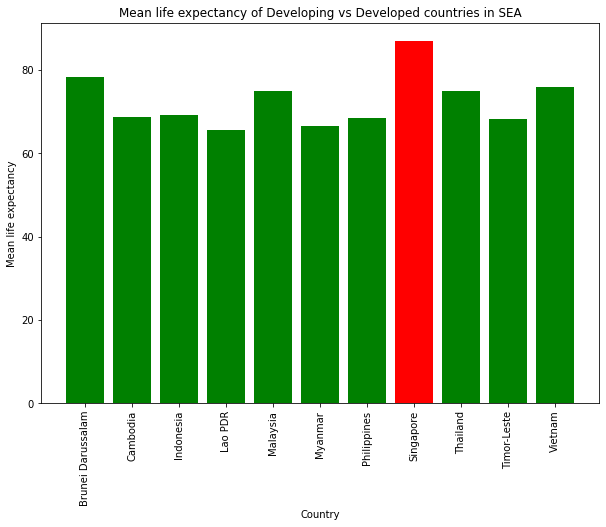

In [57]:
plt.figure(figsize =(10, 7))
plt.bar(df["country"],df["mean_life_expectancy"], color = df.Status.map({"Developed": "r", "Developing": "g"}))
plt.xticks(rotation=90)
plt.title("Mean life expectancy of Developing vs Developed countries in SEA")
plt.xlabel("Country")
plt.ylabel("Mean life expectancy")

plt.show()

The red bar represent Developed countries and the green bar represent Developing countries. 
There is only one developed countries in SEA which is Singapore.

<u><b>Insights</b></u><br>
Life expectancy is greatly influence by factors such as percentage of population living in urban areas, percentage of population that is literate, percentage of population with access to safe water and population per physician.<br>
From the bar chart, we can see that developed country (Singapore) has a higher life expectancy. 
The reason behind this could be because developed countries have better healthcare (lower population per physician) and higher living standards (access to safe water). Moreover, populations in developed countries generally have a higher socioeconomic status and higher population that is literate (knowledge about diseases and prevention of health issues)

***
## Question 2

First, we have to aggregate mean life expectancy and mean adult mortality from life_expectancy DataFrame. We also need the 2019 population data from population DataFrame. <br>
Merge the two DataFrames together, calling the new DataFrame df2 (We will then create a bar chart based on df2). <br>
For population, we have to change the data type to float in order to plot the population values in the bar chart.

In [58]:
fun2 = {"Adult Mortality":"mean","Life expectancy ":"mean"}
groupbycountry2 = life_expectancy[life_expectancy_SEA_filt].groupby("country").agg(fun2)
df2 = pd.merge(groupbycountry2,population,on="country")
df2["population(10^3)"] = df2["population(10^3)"].str.replace(" ","").astype(float)
df2

,country,Adult Mortality,Life expectancy,population(10^3)
0,Brunei Darussalam,67.0625,76.48750,433.0
1,Cambodia,196.3750,64.34375,16487.0
2,Indonesia,166.5625,67.55625,270626.0
3,Malaysia,118.5625,73.75625,31950.0
4,Myanmar,154.3125,64.20000,54045.0
5,Philippines,217.9375,67.57500,108117.0
6,Singapore,62.0000,81.47500,5804.0
7,Thailand,160.3750,73.08125,69626.0
8,Timor-Leste,170.3750,64.75625,1293.0


Now, we rename the columns into country, Mean Adult Mortality (deaths per 1000 people per year), Mean Life Expectancy (years), and 2019 Population (thousands).

In [59]:
df2.rename(
    columns={"Adult Mortality":"Mean Adult Mortality (deaths per 1000 people per year)","Life expectancy ":"Mean Life Expectancy (years)","population":"2019 Population (thousands)"},
    inplace=True
)
df2

,country,Mean Adult Mortality (deaths per 1000 people per year),Mean Life Expectancy (years),population(10^3)
0,Brunei Darussalam,67.0625,76.48750,433.0
1,Cambodia,196.3750,64.34375,16487.0
2,Indonesia,166.5625,67.55625,270626.0
3,Malaysia,118.5625,73.75625,31950.0
4,Myanmar,154.3125,64.20000,54045.0
5,Philippines,217.9375,67.57500,108117.0
6,Singapore,62.0000,81.47500,5804.0
7,Thailand,160.3750,73.08125,69626.0
8,Timor-Leste,170.3750,64.75625,1293.0


Then, we plot a side-by-side bar graph using .plot.bar().

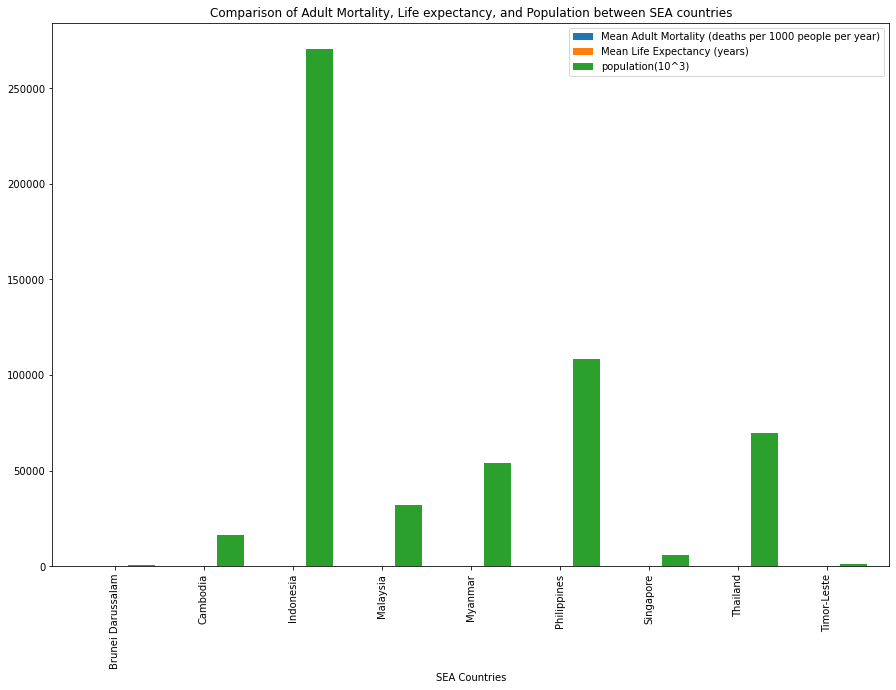

In [60]:
ax = df2.plot.bar(figsize=(15,10),width=0.9)
ax.set_xticklabels(df2["country"],rotation=90)
plt.xlabel("SEA Countries")
plt.title("Comparison of Adult Mortality, Life expectancy, and Population between SEA countries")
plt.show()

With this graph, it is impossible to visualise mean adult mortality and mean life expectancy because some values of population is simply too large. Therefore, we have to use a logarithmic bar graph to visualise all the values.

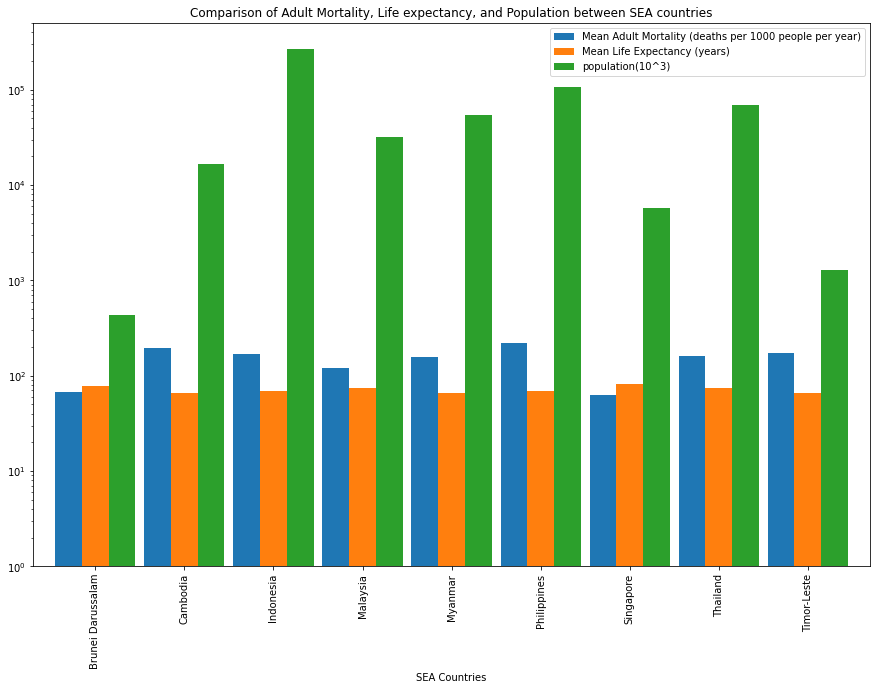

In [61]:
ax2 = df2.plot.bar(figsize=(15,10),width=0.9,log=True)
ax2.set_xticklabels(df2["country"],rotation=90)
plt.xlabel("SEA Countries")
plt.title("Comparison of Adult Mortality, Life expectancy, and Population between SEA countries")
plt.show()

Now, although the visualisation is clearer, it is still nonintuitive because it is hard to imagine the differences between each value in a logarithmic graph. Therefore, we put the actual value of each bar on the bars themselves so that we can see the actual difference in values for each bar.

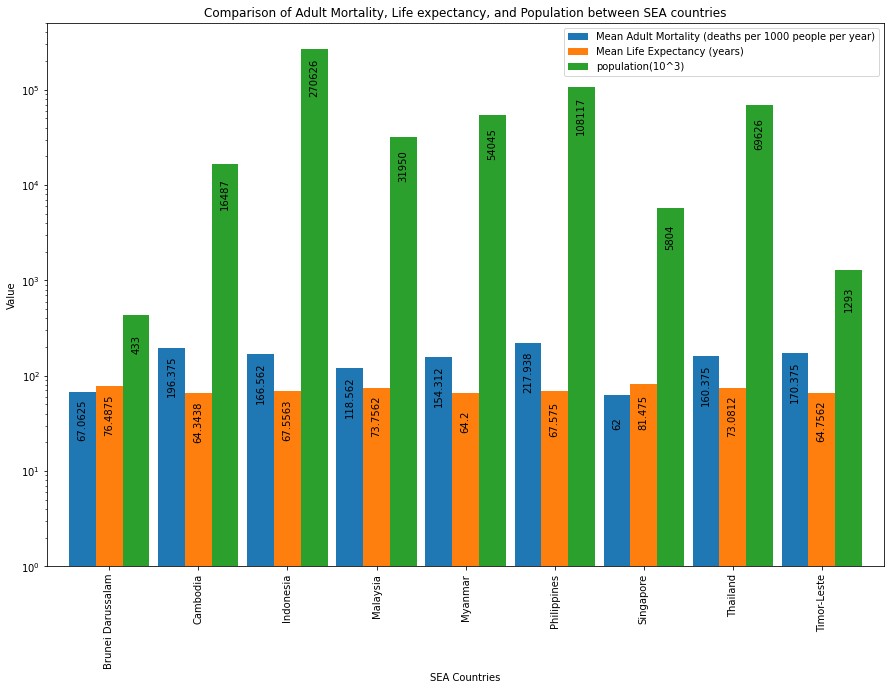

In [62]:
ax3 = df2.plot.bar(figsize=(15,10),width=0.9,log=True)
ax3.bar_label(ax3.containers[0], label_type="center",rotation=90)
ax3.bar_label(ax3.containers[1], label_type="center",rotation=90)
ax3.bar_label(ax3.containers[2], label_type="center",rotation=90)
ax3.set_xticklabels(df2["country"],rotation=90)
plt.xlabel("SEA Countries")
plt.ylabel("Value")
plt.title("Comparison of Adult Mortality, Life expectancy, and Population between SEA countries")
plt.show()

<b><u>Why the data used for the graph may be misleading</u></b><br>

With this graph, we can see that population has not much correlation with mean life expectancy, while mean adult mortality has a negative correlation with mean life expectancy, meaning that as mean adult mortality rises, mean life expectancy lowers. However, purely using this data to conclude that adult mortality lowers life expectancy may not be appropriate because correlation does not equal to causation. There are many factors that affect life expectancy, such as GDP per capita, access to healthcare, and diet and nutrition.

Another reason that using this data can be misleading is because although the mean life expectancy and mean adult mortality is calculated based on years 2000 to 2015, the population data is based on the year 2019. Thus, the time frame of the data does not match, and this can lead to misleading results.

***
# Question 3

First, we only select the data from life_expectancy DataFrame that contains data from Singapore.

In [63]:
df3 = life_expectancy[life_expectancy["country"] == "Singapore"]
df3

,country,Year,Status,Life expectancy,infant deaths,Adult Mortality,BMI,Alcohol consumption,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,Income composition of resources,Schooling
2313,Singapore,2015,Developed,83.1,0,55.0,33.2,1.79,96.0,0,96.0,96.0,0.1,0.924,15.4
2314,Singapore,2014,Developed,82.9,0,56.0,32.9,1.83,96.0,0,96.0,96.0,0.1,0.922,15.4
2315,Singapore,2013,Developed,82.7,0,57.0,32.7,1.83,97.0,138,97.0,97.0,0.1,0.920,15.4
2316,Singapore,2012,Developed,82.5,0,59.0,32.4,1.89,97.0,42,97.0,97.0,0.1,0.917,15.4
2317,Singapore,2011,Developed,82.2,0,6.0,32.1,1.80,96.0,148,96.0,96.0,0.1,0.911,15.2
2318,Singapore,2010,Developed,82.0,0,61.0,31.8,1.84,96.0,50,96.0,96.0,0.1,0.889,14.5
2319,Singapore,2009,Developed,81.7,0,62.0,31.5,1.73,96.0,16,97.0,97.0,0.1,0.887,14.4
2320,Singapore,2008,Developed,81.4,0,64.0,31.2,1.70,97.0,18,97.0,97.0,0.1,0.880,14.2
2321,Singapore,2007,Developed,81.1,0,65.0,3.9,1.60,96.0,15,97.0,97.0,0.1,0.873,14.1
2322,Singapore,2006,Developed,87.0,0,66.0,3.5,1.55,95.0,23,95.0,95.0,0.1,0.839,13.9


We can now plot a line graph about Singapore's life expectancy from 2000 to 2015.

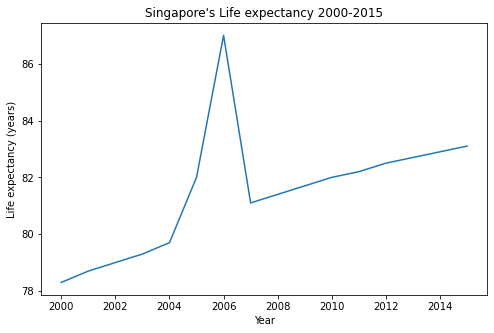

In [64]:
plt.figure(figsize=(8,5))
ax4 = plt.plot(df3["Year"],df3["Life expectancy "])
plt.xlabel("Year")
plt.ylabel("Life expectancy (years)")
plt.title("Singapore's Life expectancy 2000-2015")
plt.show()

__Circumstances in which first line graph is useful__ <br>
This line graph is useful to visualise the trend of the life expecatncy of Singapore from 2000-2015. Here, we can see that life expectancy is increasing steadily over this period of 16 years. We can also use this graph to estimate the future life expectancy by projecting the line further into future years. 

Next, we can plot another line graph containing the adult mortality and infant death of Singapore from 2000 to 2015.

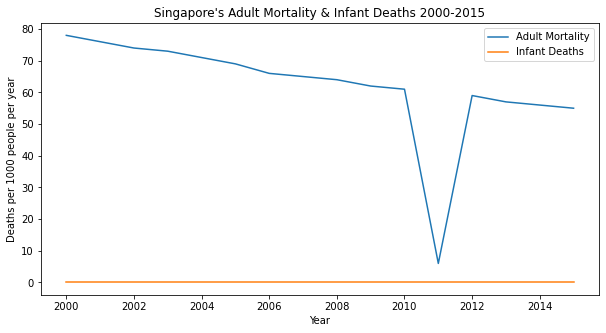

In [65]:
plt.figure(figsize=(10,5))
ax5 = plt.plot(df3["Year"], df3["Adult Mortality"], label = "Adult Mortality")
ax5 = plt.plot(df3["Year"], df3["infant deaths"], label = "Infant Deaths")
plt.xlabel("Year")
plt.ylabel("Deaths per 1000 people per year")
plt.title("Singapore's Adult Mortality & Infant Deaths 2000-2015")
plt.legend()
plt.show()

__Circumstances in which second line graph is useful__ <br>
The second graph is useful in the context of the overall health of Singapore's population. The decreasing trend of adult mortality and maintaining zero deaths per 1000 infants show that Singapore's population health is increasing. 

__Effect infant and adult mortality rates on life expectancy__ <br>
By using the second graph to compare with the first graph we can see that as adult mortality decreases, life expectancy increases, while infant deaths seemingly have no effect on life expectancy based on these two graphs. Here, because Singapore's population health is increasing, it also causes life expectancy to increase. Adult mortality are affected by multiple factors, such as diseases, heridity, nutritional level, healthcare access, and education. A decrease in adult mortality might indicate that there is improvement in these factors in Singapore. These factors are also major factors in life expectancy of a country. Hence, this might be the reason why a lower adult mortality over time correlates with the increase in life expectancy over time.

***
## Conclusion

To conclude, the bar chart that we have plotted in question 1 shows that developed countries have a higher life expectancy that developing countries in South East Asia. Furthermore, in question 2, we plotted a side-by-side bar chart showing the relationship of adult mortality, life expectancy, and population for SEA countries, and explained how purely using this data is misleading. Question 3 featured 2 line graphs, the first graph being Singapore's life expectancy from 2000-2015, and the second graph being Singapore's adult mortality and infant death from 2000-2015. The line graphs showed that adult mortality was negatively correlated to life expectancy.